In [32]:
%matplotlib inline

In [33]:
# Pulled from http://pandas.pydata.org/pandas-docs/stable/10min.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
s = pd.Series([1, 2, 3, np.nan, 6, 8])
s

0     1
1     2
2     3
3   NaN
4     6
5     8
dtype: float64

In [35]:
dates = pd.date_range('20150101', periods=6)
dates

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D')

In [36]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2015-01-01,0.054402,0.840541,0.506616,-1.213443
2015-01-02,1.475754,0.484677,-0.900068,0.509289
2015-01-03,-0.839833,0.010034,-2.154263,1.880960
2015-01-04,-0.792141,0.111676,-1.905728,0.395135
2015-01-05,-1.102251,-0.107386,2.780854,0.672638
2015-01-06,0.095471,0.958569,0.993392,1.537929


In [37]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.184766,0.383019,-0.113200,0.630418
std,0.952140,0.448143,1.896445,1.082504
min,-1.102251,-0.107386,-2.154263,-1.213443
25%,-0.827910,0.035445,-1.654313,0.423673
50%,-0.368869,0.298177,-0.196726,0.590964
75%,0.085204,0.751575,0.871698,1.321607
max,1.475754,0.958569,2.780854,1.880960


In [38]:
df.T

,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00
A,0.054402,1.475754,-0.839833,-0.792141,-1.102251,0.095471
B,0.840541,0.484677,0.010034,0.111676,-0.107386,0.958569
C,0.506616,-0.900068,-2.154263,-1.905728,2.780854,0.993392
D,-1.213443,0.509289,1.880960,0.395135,0.672638,1.537929


In [39]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2015-01-01,-1.213443,0.506616,0.840541,0.054402
2015-01-02,0.509289,-0.900068,0.484677,1.475754
2015-01-03,1.880960,-2.154263,0.010034,-0.839833
2015-01-04,0.395135,-1.905728,0.111676,-0.792141
2015-01-05,0.672638,2.780854,-0.107386,-1.102251
2015-01-06,1.537929,0.993392,0.958569,0.095471


In [40]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2015-01-06,0.095471,0.958569,0.993392,1.537929
2015-01-01,0.054402,0.840541,0.506616,-1.213443
2015-01-02,1.475754,0.484677,-0.900068,0.509289
2015-01-04,-0.792141,0.111676,-1.905728,0.395135
2015-01-03,-0.839833,0.010034,-2.154263,1.880960
2015-01-05,-1.102251,-0.107386,2.780854,0.672638


In [41]:
df.loc[:,['A','D']]

,A,D
2015-01-01,0.054402,-1.213443
2015-01-02,1.475754,0.509289
2015-01-03,-0.839833,1.880960
2015-01-04,-0.792141,0.395135
2015-01-05,-1.102251,0.672638
2015-01-06,0.095471,1.537929


In [42]:
df.at[dates[3], 'A']

-0.79214056643319586

In [43]:
df[df>0]

,A,B,C,D
2015-01-01,0.054402,0.840541,0.506616,NaN
2015-01-02,1.475754,0.484677,NaN,0.509289
2015-01-03,NaN,0.010034,NaN,1.880960
2015-01-04,NaN,0.111676,NaN,0.395135
2015-01-05,NaN,NaN,2.780854,0.672638
2015-01-06,0.095471,0.958569,0.993392,1.537929


In [44]:
df['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df

,A,B,C,D,E
2015-01-01,0.054402,0.840541,0.506616,-1.213443,one
2015-01-02,1.475754,0.484677,-0.900068,0.509289,one
2015-01-03,-0.839833,0.010034,-2.154263,1.880960,two
2015-01-04,-0.792141,0.111676,-1.905728,0.395135,three
2015-01-05,-1.102251,-0.107386,2.780854,0.672638,four
2015-01-06,0.095471,0.958569,0.993392,1.537929,three


In [45]:
df[df['E'].isin(['two','four'])]

,A,B,C,D,E
2015-01-03,-0.839833,0.010034,-2.154263,1.880960,two
2015-01-05,-1.102251,-0.107386,2.780854,0.672638,four


In [46]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20150102', periods=6))
s1

2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
2015-01-06    5
2015-01-07    6
Freq: D, dtype: int64

In [47]:
df['F'] = s1
df.at[dates[0], 'A'] = 0
df.iat[0,1] = 0
df.iat[0,2] = np.random.rand()
df.loc[:, 'D'] = np.array([5] * len(df))

In [48]:
df

,A,B,C,D,E,F
2015-01-01,0.000000,0.000000,0.999004,5,one,NaN
2015-01-02,1.475754,0.484677,-0.900068,5,one,1
2015-01-03,-0.839833,0.010034,-2.154263,5,two,2
2015-01-04,-0.792141,0.111676,-1.905728,5,three,3
2015-01-05,-1.102251,-0.107386,2.780854,5,four,4
2015-01-06,0.095471,0.958569,0.993392,5,three,5


In [49]:
df.dropna(how='any')

,A,B,C,D,E,F
2015-01-02,1.475754,0.484677,-0.900068,5,one,1
2015-01-03,-0.839833,0.010034,-2.154263,5,two,2
2015-01-04,-0.792141,0.111676,-1.905728,5,three,3
2015-01-05,-1.102251,-0.107386,2.780854,5,four,4
2015-01-06,0.095471,0.958569,0.993392,5,three,5


In [50]:
df.fillna(value=5)

,A,B,C,D,E,F
2015-01-01,0.000000,0.000000,0.999004,5,one,5
2015-01-02,1.475754,0.484677,-0.900068,5,one,1
2015-01-03,-0.839833,0.010034,-2.154263,5,two,2
2015-01-04,-0.792141,0.111676,-1.905728,5,three,3
2015-01-05,-1.102251,-0.107386,2.780854,5,four,4
2015-01-06,0.095471,0.958569,0.993392,5,three,5


In [51]:
df.mean()

A   -0.193833
B    0.242928
C   -0.031135
D    5.000000
F    3.000000
dtype: float64

In [52]:
df.mean(1)

2015-01-01    1.499751
2015-01-02    1.412073
2015-01-03    0.803188
2015-01-04    1.082761
2015-01-05    2.114243
2015-01-06    2.409486
Freq: D, dtype: float64

In [53]:
df.sum(1)

2015-01-01     5.999004
2015-01-02     7.060363
2015-01-03     4.015938
2015-01-04     5.413807
2015-01-05    10.571217
2015-01-06    12.047432
Freq: D, dtype: float64

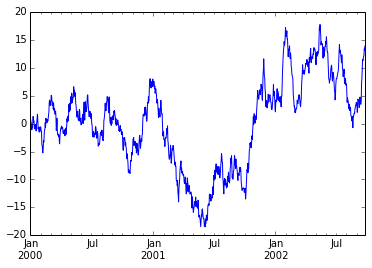

In [54]:
# Plotting
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

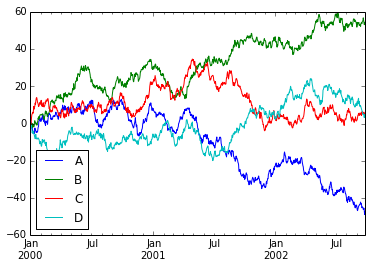

In [55]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [56]:
# CSV!
df.to_csv('foo.csv')

In [31]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.840654,0.887184,0.904223,0.258760
1,2000-01-02,0.703931,2.639105,-0.088299,0.674169
2,2000-01-03,1.407873,3.710416,0.981541,1.867817
3,2000-01-04,1.072191,5.902792,1.090751,2.038106
4,2000-01-05,0.818028,4.631318,1.524670,3.116843
5,2000-01-06,0.727893,5.211073,1.387693,0.826371
6,2000-01-07,-1.283300,4.006943,1.374726,0.908084
7,2000-01-08,0.108645,3.697152,-0.384527,1.252919
8,2000-01-09,-1.277069,3.506524,0.328323,2.844762
9,2000-01-10,-2.424930,3.658181,0.475725,2.262154
